<a href="https://colab.research.google.com/github/RahulJuluru2/unit4assignments/blob/main/U4W20_48_Keras_Chess_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives





At the end of the experiment you will be able to :

* load and extract features of images

* implement convolutional neural networks using Keras Function API 

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/24_aug_2021_Keras_Chess.mp4" type="video/mp4">
</video>
""")


## Dataset
The dataset chosen for this  experiment is a handmade TalentSprint Chess dataset.The dataset with over 54692 images of Chess Pieces and  the pictures are captured in different angles at 0 degree,15 degree, 30 degree, 45 degree, 60 degree, 75 degree and 90 degree. We have 12 classes in this dataset (BishopBW, BishopColor, KingBW, KingColor, KnightBW, KnightColor, PawnBW,PawnColor, QueenBW, QueenColor, RookBW, RookColor). 


## Setup Steps

In [ ]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id="2216842"#@param{type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="9959488784"#@param{type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U4W20_48_Keras_Chess_C" #name of the notebook
def setup():
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Asokan_Chess_Pieces.zip")
    ipython.magic("sx unzip -qq Asokan_Chess_Pieces.zip")
    ipython.magic("sx pip uninstall keras-preprocessing") 
    ipython.magic("sx pip install git+https://github.com/keras-team/keras-preprocessing.git") 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten,Dropout
from keras.layers.pooling import MaxPooling2D

### Load the data

#### About glob.iglob:

The glob library  provides methods for traversing the file system and returning files that matched a defined set of glob patterns.

**Note:** Refer to  [glob.iglob](https://docs.python.org/3/library/glob.html)

In [ ]:
images_data = glob.glob("/content/Asokan_Chess_Pieces/*/*.png")
len(images_data)

54692

### Extract features and labels from the data

In [ ]:
labels = []
data = []
for image in images_data:
    try:
        img = Image.open(image)
        data.append(np.array(img))
        labels.append(image.split("/")[-1].split('_')[1]+image.split("/")[-1].split('_')[2])
        
    except:
        pass

In [ ]:
len(data), len(labels)

(54692, 54692)

In [ ]:
# Converting lists into numpy arrays
data = np.array(data)
print("data:",data.shape)
labels = np.array(labels)
print("labels:",labels)

data: (54692, 64, 64, 4)
labels: ['QueenBW' 'QueenBW' 'QueenBW' ... 'PawnBW' 'PawnBW' 'PawnBW']


### Label Encoding

Convert the output labels to integer encoded, to understand more about label encoding, refer [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print("Labels before label encoding", np.unique(labels))
labels = le.fit_transform(labels)
print("Labels after label encoding", np.unique(labels))

Labels before label encoding ['BishopBW' 'BishopColor' 'KingBW' 'KingColor' 'KnightBW' 'KnightColor'
 'PawnBW' 'PawnColor' 'QueenBW' 'QueenColor' 'RookBW' 'RookColor']
Labels after label encoding [ 0  1  2  3  4  5  6  7  8  9 10 11]


### Splitting the data into train and test sets 

In [ ]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
len(y_train), len(y_test)

(43753, 10939)

### Data Pre-Processing

In [ ]:
# Convert the integer encoded labels to a one-hot vector since it is a multi-classification problem
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### Convolutional Neural Network

In this section, we will define a convolutional neural network for image classification.

The model receives 64×64x4 images as input, then has a sequence of two convolutional and pooling layers as feature extractors. Followed by a fully connected layer to interpret the features and an output layer with a softmax activation for classification.

In [ ]:
input = Input(shape=(64,64,4))
conv1 = Conv2D(32, kernel_size=5, activation='relu')(input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
drp1 = Dropout(0.25)(pool1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(drp1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
drp2 = Dropout(0.25)(pool2)
flat = Flatten()(drp2)
fc1 = Dense(128, activation='relu')(flat)
fc2 = Dense(64, activation = 'relu')(fc1)
output = Dense(12, activation='softmax')(fc2)
model = Model(inputs=input, outputs=output)

# Summarize layers
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 4)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 32)        3232      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                         


Compiling the CNN
 
* The first parameter is to get the optimal set of weights in the neural network. Adam is really efficient  to use for large amount of data.
* The second parameter is the loss function. Since our classes are categorical, we use  categorical_crossentopy loss function. 
* The final argument is the criterion to evaluate the model. In this case we use the accuracy.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
	 metrics=['accuracy'])

### Training the Model

* First parameter contains train images
* Second parameter contains labels
* Epochs represents the number of times we’re going to pass our full dataset through the CNN.

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=5)

Epoch 1/5
1368/1368 [==============================] - 308s 224ms/step - loss: 1.8256 - accuracy: 0.9289
Epoch 2/5
1368/1368 [==============================] - 296s 216ms/step - loss: 0.0998 - accuracy: 0.9708
Epoch 3/5
1368/1368 [==============================] - 295s 215ms/step - loss: 0.0334 - accuracy: 0.9852
Epoch 4/5
1368/1368 [==============================] - 294s 215ms/step - loss: 0.0229 - accuracy: 0.9880
Epoch 5/5
1368/1368 [==============================] - 293s 214ms/step - loss: 0.0717 - accuracy: 0.9740


### Evaluate the model

* First parameter is predicted labels of the test images
* Second parameter is actual labels of the test labels

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat) 

342/342 [==============================] - 20s 59ms/step - loss: 0.0198 - accuracy: 0.9897


### Predict Labels

In [ ]:
preds = model.predict(X_test)

In [ ]:
predicted_classes = np.argmax(np.round(preds),axis=1)

In [ ]:
predicted_classes.shape,y_test.shape

((10939,), (10939,))

### Visualizing the correct predicted images  with actual class

Found 10800 correct predictions out of 10939 test samples


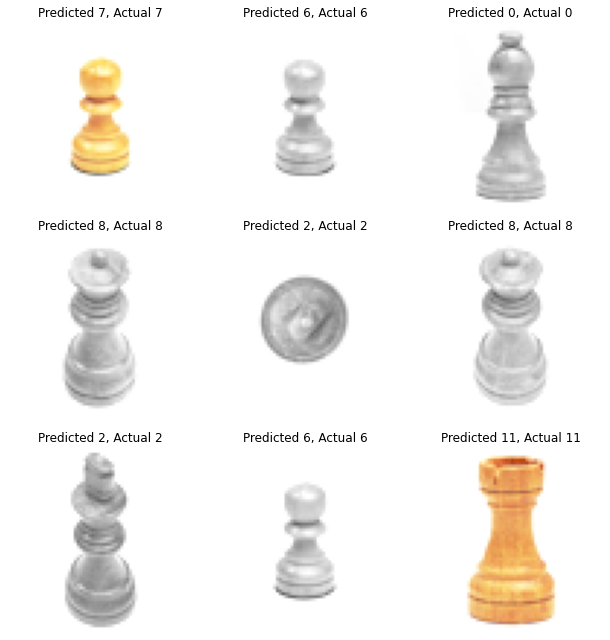

In [ ]:
class_names = {i:cn for i, cn in enumerate(['BishopBW', 'BishopColor', 'KingBW', 'KingColor', 'KnightBW',
       'KnightColor', 'PawnBW', 'PawnColor', 'QueenBW', 'QueenColor',
       'RookBW', 'RookColor']) }
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct predictions" % len(correct), "out of %d test samples" % (y_test.shape))
plt.figure(figsize=(9,9))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct])
    plt.axis('off')
    plt.title("Predicted {}, Actual {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

### Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given 12 classes.

In [ ]:
class_names = {i:cn for i, cn in enumerate(['BishopBW', 'BishopColor', 'KingBW', 'KingColor', 'KnightBW',
       'KnightColor', 'PawnBW', 'PawnColor', 'QueenBW', 'QueenColor',
       'RookBW', 'RookColor']) }
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97       867
     Class 1       1.00      1.00      1.00      1049
     Class 2       1.00      1.00      1.00      1140
     Class 3       1.00      1.00      1.00       930
     Class 4       0.92      0.98      0.95      1041
     Class 5       1.00      0.89      0.94      1051
     Class 6       1.00      1.00      1.00      1075
     Class 7       1.00      1.00      1.00       836
     Class 8       1.00      1.00      1.00      1016
     Class 9       1.00      1.00      1.00      1156
    Class 10       1.00      1.00      1.00       183
    Class 11       1.00      1.00      1.00       595

    accuracy                           0.99     10939
   macro avg       0.99      0.99      0.99     10939
weighted avg       0.99      0.99      0.99     10939



### Please answer the questions below to complete the experiment:




In [ ]:
#@title Select True or False: Does functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.
Answer = "TRUE" #@param ["","TRUE","FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3283
Date of submission:  25 Sep 2022
Time of submission:  15:49:01
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
